# **CS 181 HW5 Problem 2**
---

#### Initialize data:

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)  # download MNIST
N = 6000 

x = mnist_trainset.data[:N]  # select N datapoints
x = x.flatten(1)             # flatten the images
x = x.float()                # convert pixels from uint8 to float
# x = x.numpy()              # uncomment to use numpy (optional)

1.6%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


102.8%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




58.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### **Todo:** implement PCA

*Hint: see `.linalg.svd()`*

In [84]:
def pca(x, n_comps=500):
    X = x - x.mean(axis = 0)
    sv = torch.linalg.svd(X)
    top_eigvals = (sv[1]**2 /N)[:n_comps]
    top_pcomps = sv[2][:n_comps,]
    return top_eigvals, top_pcomps

#### **Todo:** calculate cumulative fraction of variance

*Hint: see `.cumsum()`*

In [30]:
def calc_cfvs(eigvals):
    cum_var = eigvals.cumsum(0)
    cum_frac_vars = cum_var / cum_var[-1]
    return cum_frac_vars


tensor(1.)

#### **Todo:** calculate mean squared L2 norm reconstruction loss

In [75]:
def calc_errs(x, pcomps):
    err_mean = torch.sum((x-x.mean(axis=0))**2)/N
    err_pcomp = 0
    for j in range(x.shape[0]):
        scores = pcomps @ x[j,]
        proj = torch.zeros(x.shape[1])
        for s in range(scores.shape[0]):
            proj += scores[s] * pcomps[s,]
        err_pcomp += torch.sum((x[j,] - proj)**2)/N
    return err_mean, err_pcomp

#### Plot and print errors:

In [67]:
def plot_pic(pic, ax, title=''):
    x = pic.reshape(28, 28)
    ax.imshow(x, cmap='binary')
    ax.set_title(title)
    ax.axis('off')

def make_plots(eigvals, cfvs, x_mean, pcomps):
    # plot eigenvals and cfvs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.plot(eigvals, color='tomato')
    ax1.set_title('Eigenvalues')
    ax2.plot(cfvs, color='tomato')
    ax2.set_title('CFVs')
    fig.savefig('p2_cfvs.pdf')

    # plot mean
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    plot_pic(x_mean, ax, title='Mean')
    fig.savefig('p2_mean.pdf')

    # plot top 10 pcomps
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        plot_pic(pcomps[i], axes.flat[i], title=f'PC index {i}')
    fig.savefig('p2_pcomps.pdf')

Reconstruction error (using mean): 3.436024e+06
Reconstruction error (using mean and top 10 pcomps): 2.077421e+03


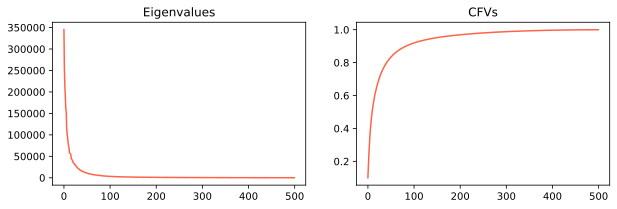

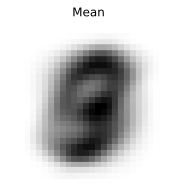

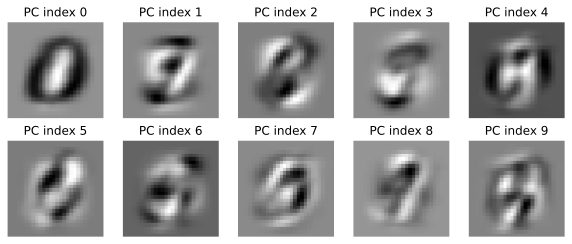

In [86]:
# do PCA
eigvals, pcomps = pca(x)

# calculate CFVs
fcvs = calc_cfvs(eigvals)

# print errors
err_mean, err_pcomp = calc_errs(x, pcomps)
print(f'Reconstruction error (using mean): {err_mean:3e}')
print(f'Reconstruction error (using mean and top 10 pcomps): {err_pcomp:3e}')

# make plots
make_plots(eigvals, fcvs, x.mean(0), pcomps)
